<a href="https://colab.research.google.com/github/Priyo-prog/Understanding-product-review/blob/main/Understanding_Product_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Natural Language Processing can be used to build predictive models to perform sentiment analysis on posts and reviews whether customers are happy or not.



# Import dataset and libraries

In [2]:
# Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Mount the drive for fetching the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Data Science/Product Review NLP/amazon_alexa.tsv', sep='\t')

In [5]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
# Get the statistical data of the dataset
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# **Explore Dataset**

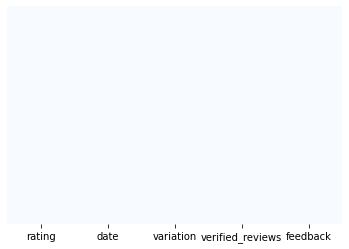

In [8]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead80b4950>,
      dtype=object)

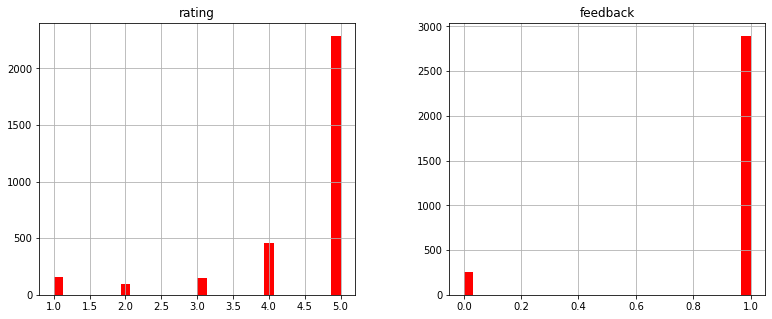

In [9]:
reviews_df.hist(bins=30, figsize=(13,5), color='r')

In [10]:
# Add a length column to the dataset to find out the lengths of the review text by customers
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [11]:
#Let's now see the reviews_df dataset
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


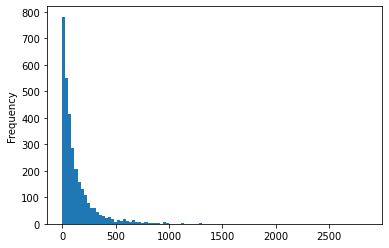

In [12]:
reviews_df['length'].plot(bins=100, kind='hist')

In [13]:
# Get the statistical view of the 'length' column
reviews_df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [14]:
# Get the logest review
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [15]:
# Get the shortest review
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [16]:
# Get the positive and negative reviews in 2 diferrent dataframes
positive_df = reviews_df[reviews_df['feedback'] == 1]

In [17]:
positive_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [18]:
negative_df = positive_df = reviews_df[reviews_df['feedback'] == 0]

In [19]:
negative_df.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


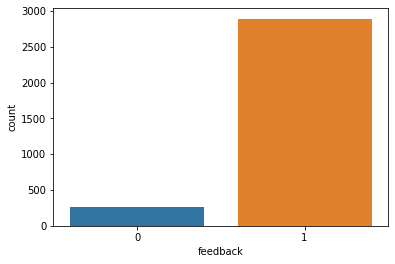

In [20]:
sns.countplot(reviews_df['feedback'], label='Count')

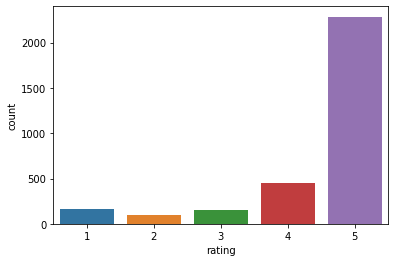

In [21]:
sns.countplot(x='rating', data = reviews_df)

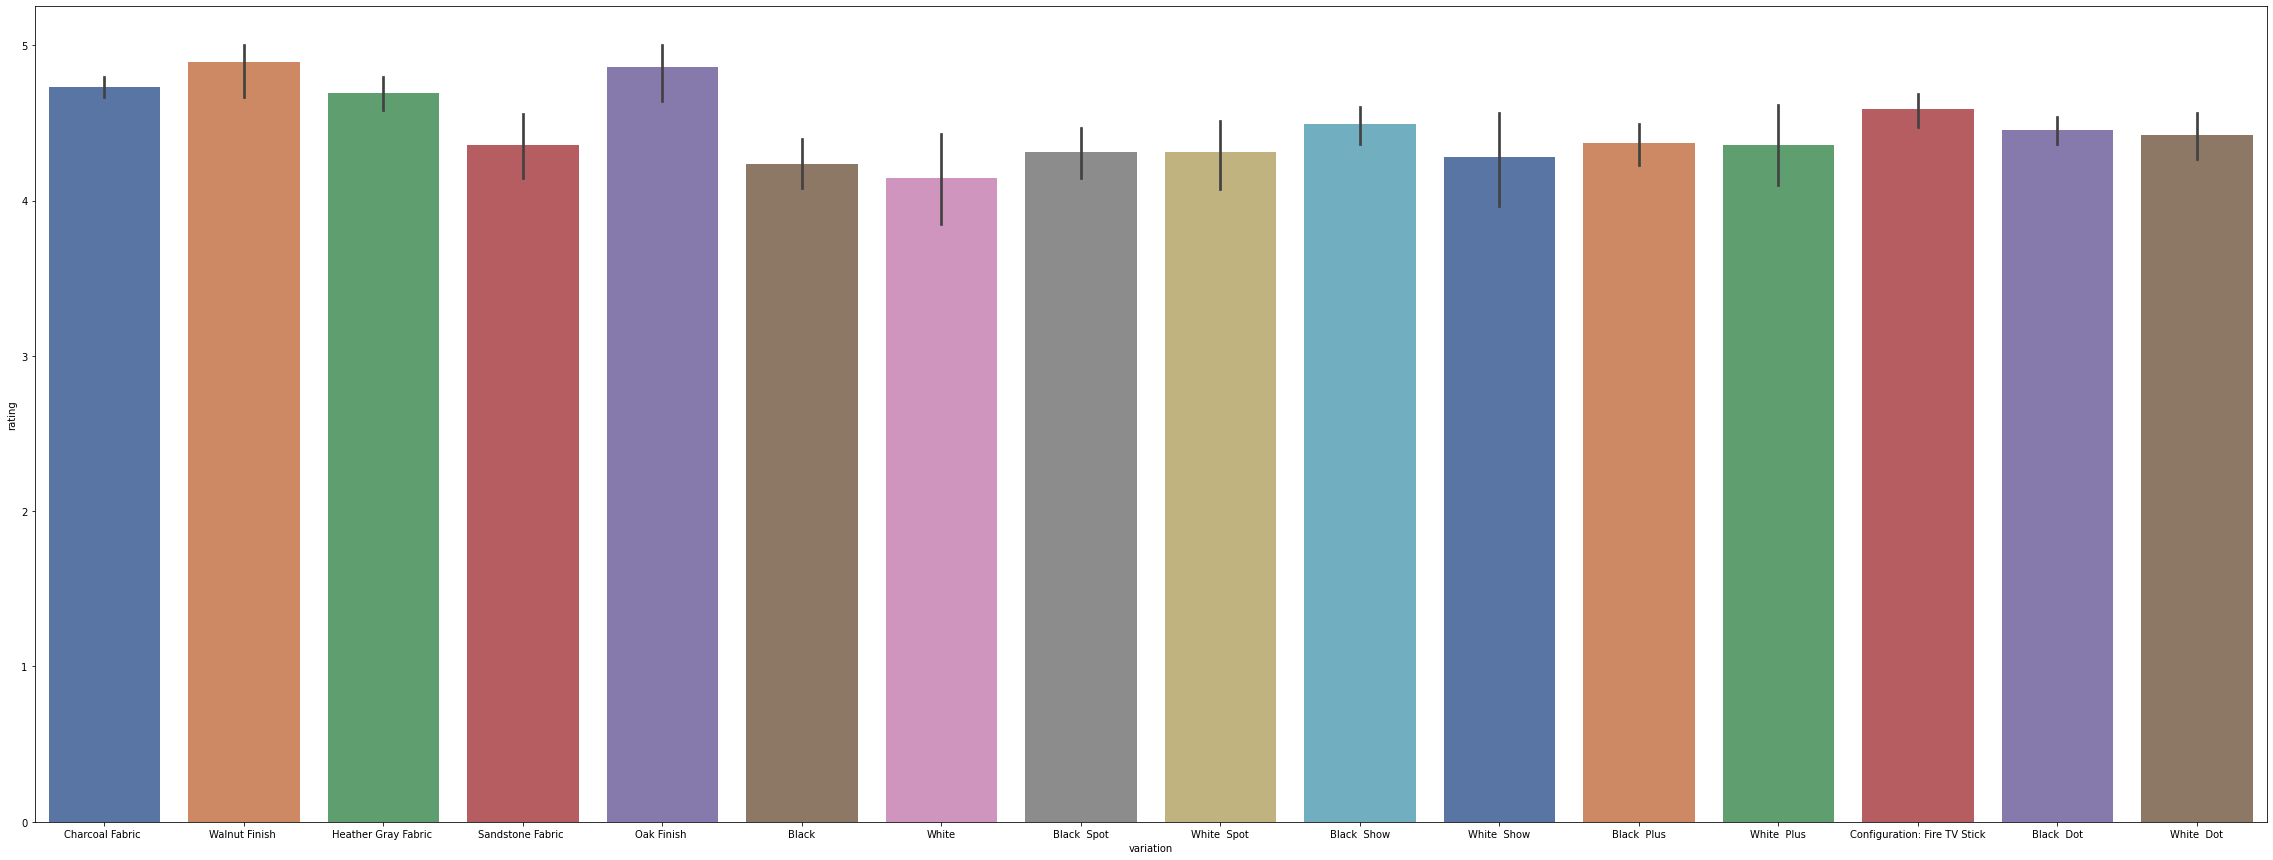

In [22]:
# Let's find how many color variation people like of the product
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating', data=reviews_df, palette='deep')

### Let us find out what generally people are speaking in positive and negative reviews. What words are most used in these reviews using 'wordcloud' 

In [23]:
# First get all reviews in a list
sentences = reviews_df['verified_reviews'].tolist()

In [24]:
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [25]:
# Now join all the review sentences to one giant string
sentences_as_one_string = ' '.join(sentences)

In [26]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

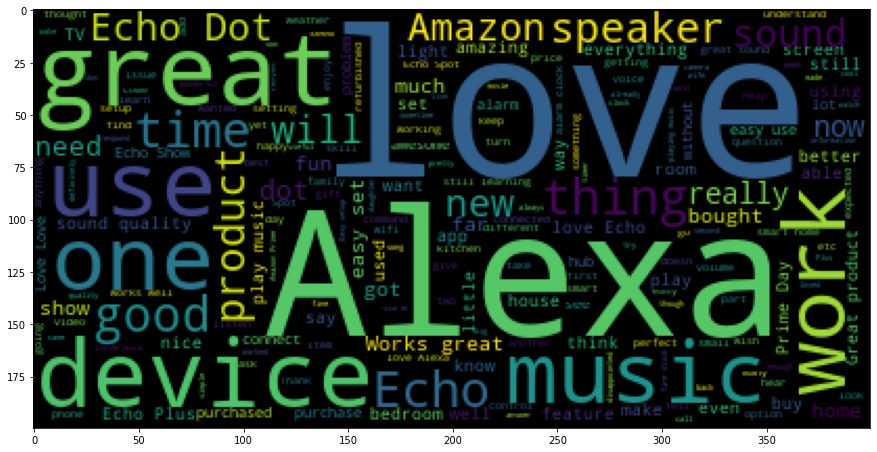

In [27]:
# Now import the wordcloud
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# **Data Cleaning**

In [28]:
# Remove the columns like 'Date', 'ratings' and 'length'
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis=1)

In [29]:
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [30]:
# Now convert the categorical column variation with dummy variable also use 'drop_first' as 'True' to avoid dummy variable trap
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)
variation_dummies 

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:
# Now drop the variation column and replace it with variation dummies
reviews_df.drop(['variation'], axis=1, inplace=True)
reviews_df = pd.concat([reviews_df,variation_dummies], axis=1)
reviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
positive_df.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


### Analyzing the sentiment of the reviews using VADER of NLTK package

In [34]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
# Create an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [37]:
# Check the length of the postive dataset reviews
positive_df['length'].describe()

count     257.000000
mean      215.241245
std       236.325955
min         1.000000
25%        53.000000
50%       137.000000
75%       289.000000
max      1686.000000
Name: length, dtype: float64

In [38]:
# Check the longest review of the positive reviews
longest_review = positive_df[positive_df['length'] == 1686]['verified_reviews'].iloc[0]
longest_review

"I have been thinking about getting this for a long time and was excited when it arrived bundled with a Philip Hue bulb.  The excited ended quickly.  I spend about a total of 4 hours attempting to add this bulb to my Alexa Echo Plus.  Everything I tried, ended in a Discovery Failed message.  I tried to set this up over and over and over again.  I watched YouTube videos.  I read set up websites.  I was the poster child of insanity (doing the same thing over and over again and expecting different results).The next day I went onto Amazon to get the tech support.  I was hoping something would be done to make this thing work, but also the problem not being operator error.  Well after 3 tech support staff and 1 hr. and 19 mins. of being on the phone, it still didn't work.  This product has tested my patience.  So far this experience is shifting my mindset from going to a smart home to just kicking it old school.The only reason I gave this two stars is because Amazon will be sending me a diff

In [39]:
# Now check the actual sentiment of the review using SentimentIntensityAnalyzer
sid.polarity_scores(longest_review)

{'compound': 0.9329, 'neg': 0.073, 'neu': 0.798, 'pos': 0.129}